In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
from sklearn import metrics
from statsmodels.graphics.gofplots import qqplot

C:\Users\User\miniconda3\envs\PythonCPU\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 1. Loading the dataset and EDA

In [2]:
df_train = pd.read_csv("intern_data.csv")
df_train.shape

(500, 10)

In [3]:
df_test = pd.read_csv("intern_test.csv")
df_test.shape

(4500, 9)

The training dataset is significantly lower than the testing dataset. This might be a problem. Regardless, let's explore the training dataset first.

In [4]:
df_train.head(5)

,Unnamed: 0,a,b,c,d,e,f,g,h,y
0,7,0.951786,0.669570,green,0.170130,0.623469,0.925886,0.812685,white,3.707514
1,43,0.510447,0.922627,red,0.087899,0.025415,0.698444,0.658545,white,2.689243
2,47,0.294838,0.351081,yellow,0.710892,0.699661,0.545722,0.836863,black,2.886508
3,53,0.798645,0.572042,green,0.026137,0.609730,0.488668,0.342675,black,2.478168
4,54,0.689666,0.395323,red,0.172448,0.736433,0.708408,0.695521,white,3.182666


Seems like we have 2 categorical columns to be considered here, which is c and h

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  500 non-null    int64  
 1   a           500 non-null    float64
 2   b           500 non-null    float64
 3   c           500 non-null    object 
 4   d           500 non-null    float64
 5   e           500 non-null    float64
 6   f           500 non-null    float64
 7   g           500 non-null    float64
 8   h           500 non-null    object 
 9   y           500 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 39.2+ KB


No null values, seems good to go

In [6]:
df_train.describe()

,Unnamed: 0,a,b,d,e,f,g,y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2442.692000,0.497413,0.505397,0.501722,0.501899,0.526562,0.508442,2.682803
std,1416.963518,0.292947,0.292450,0.284623,0.272019,0.292175,0.284332,0.592533
min,7.000000,0.002801,0.000369,0.000592,0.002387,0.001327,0.005644,0.981376
25%,1177.250000,0.253897,0.256446,0.252244,0.270069,0.262523,0.263525,2.300795
50%,2390.500000,0.510420,0.514069,0.496800,0.515185,0.506412,0.526403,2.726900
75%,3701.250000,0.760192,0.766578,0.735650,0.732240,0.790898,0.742125,3.155562
max,4997.000000,0.999690,0.997025,0.998282,0.998994,0.999271,0.998156,3.980509


In [7]:
# Numerical variables:
numerical = df_train.select_dtypes(include = ["int64","float64"]).keys()
print(numerical)

Index(['Unnamed: 0', 'a', 'b', 'd', 'e', 'f', 'g', 'y'], dtype='object')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000235EFEE2C88>,
      dtype=object)

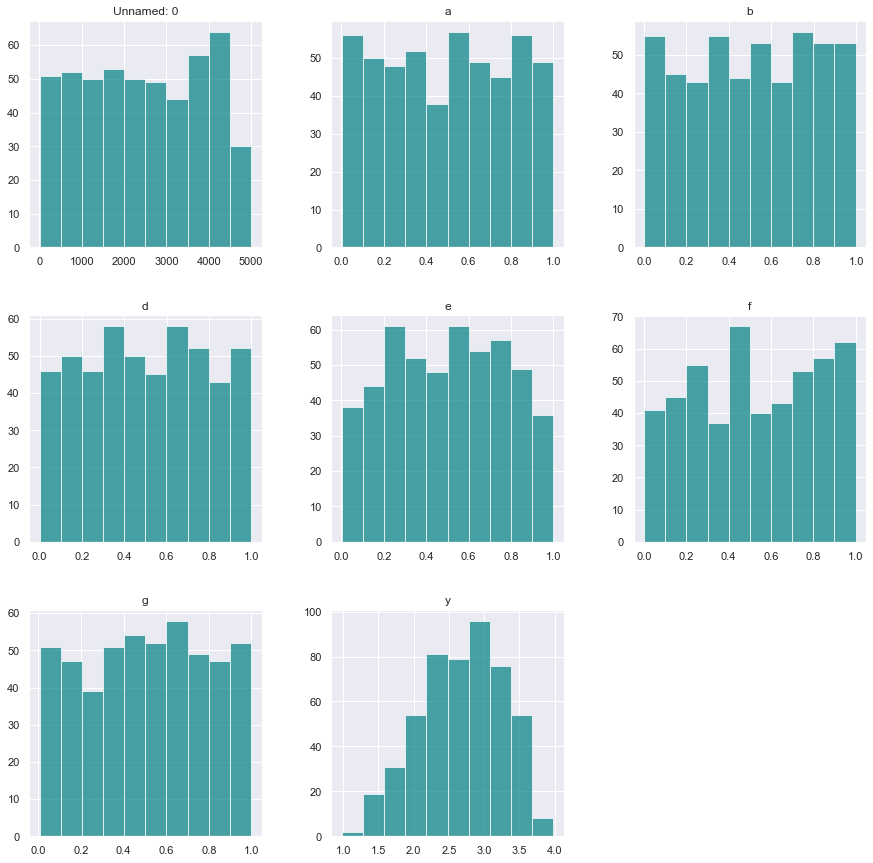

In [8]:
# Quick visualization
# plt.style.use('ggplot')
import seaborn as sns

rcParams['figure.figsize'] = 15, 15
sns.set(style="darkgrid")

df_train[numerical].hist(stacked=True, color='teal', alpha=0.7)

Seems like y is normally distributed, there is not any skewness in other columns but it's not quite normal distribution either.

Let's inspect the categorical columns

In [9]:
# Categorical variables:
categorical = df_train.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['c', 'h'], dtype='object')


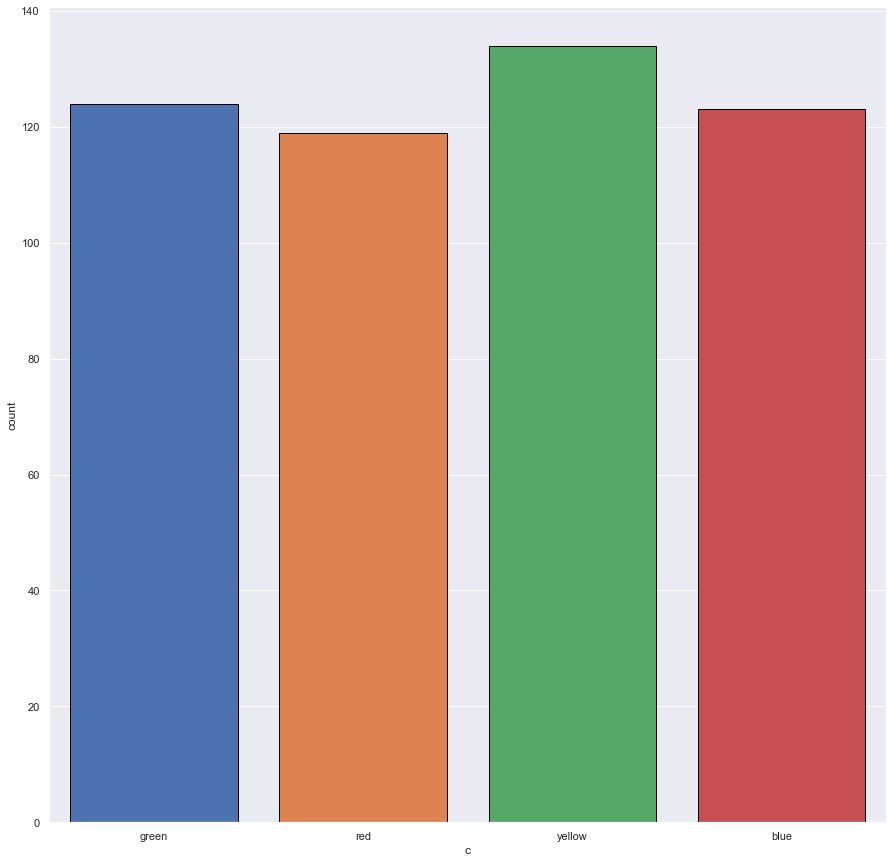

In [10]:
import seaborn as sns

sns.set(style="darkgrid")
ax = sns.countplot(x=df_train['c'], data=df_train, edgecolor=(0,0,0), linewidth=1, saturation=1)

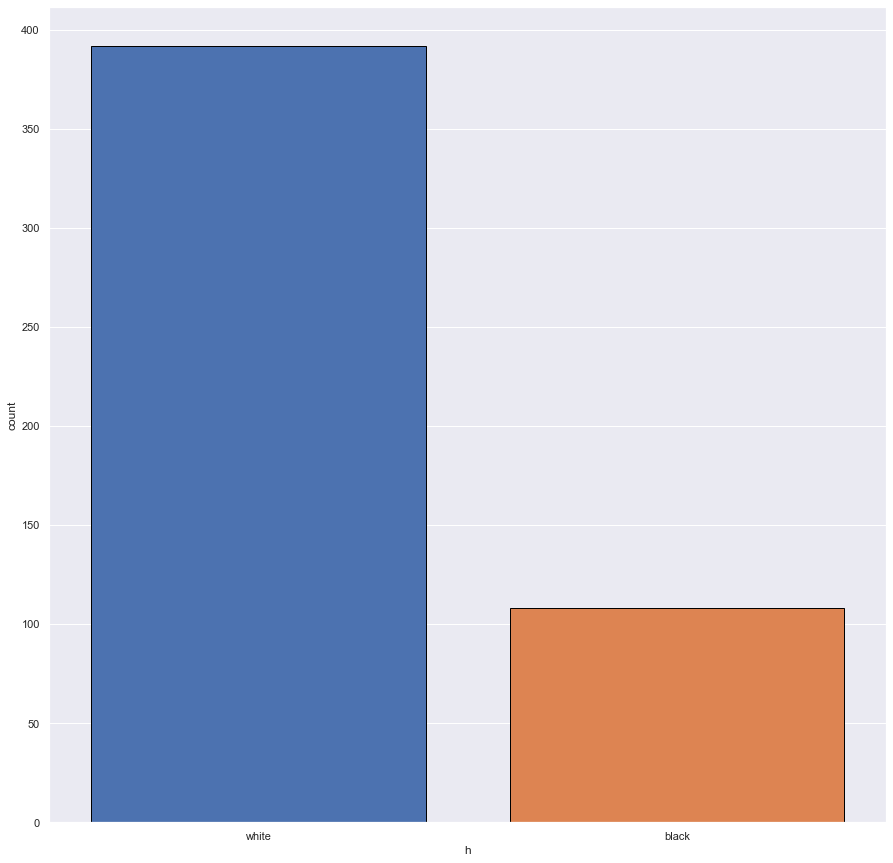

In [11]:
sns.set(style="darkgrid")
ax = sns.countplot(x=df_train['h'], data=df_train, edgecolor=(0,0,0), linewidth=1, saturation=1)

Encoding the categorical columns. One hot encoding will be used to encode them.

In [12]:
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
df_train['c_cat'] = labelencoder.fit_transform(df_train['c'])
df_train

,Unnamed: 0,a,b,c,d,e,f,g,h,y,c_cat
0,7,0.951786,0.669570,green,0.170130,0.623469,0.925886,0.812685,white,3.707514,1
1,43,0.510447,0.922627,red,0.087899,0.025415,0.698444,0.658545,white,2.689243,2
2,47,0.294838,0.351081,yellow,0.710892,0.699661,0.545722,0.836863,black,2.886508,3
3,53,0.798645,0.572042,green,0.026137,0.609730,0.488668,0.342675,black,2.478168,1
4,54,0.689666,0.395323,red,0.172448,0.736433,0.708408,0.695521,white,3.182666,2
...,...,...,...,...,...,...,...,...,...,...,...
495,4889,0.195745,0.791511,green,0.784001,0.778692,0.407301,0.895939,white,3.646691,1
496,4910,0.995119,0.076542,yellow,0.326500,0.829949,0.500763,0.545784,white,3.270344,3
497,4920,0.091773,0.326965,green,0.922553,0.257745,0.348771,0.624851,white,2.672514,1
498,4931,0.761853,0.654755,blue,0.252334,0.128781,0.658069,0.405367,black,1.259850,0


In [13]:
df_train['h_cat'] = df_train['h'].replace({'white':1, 'black':0})

Correlation heatmap 

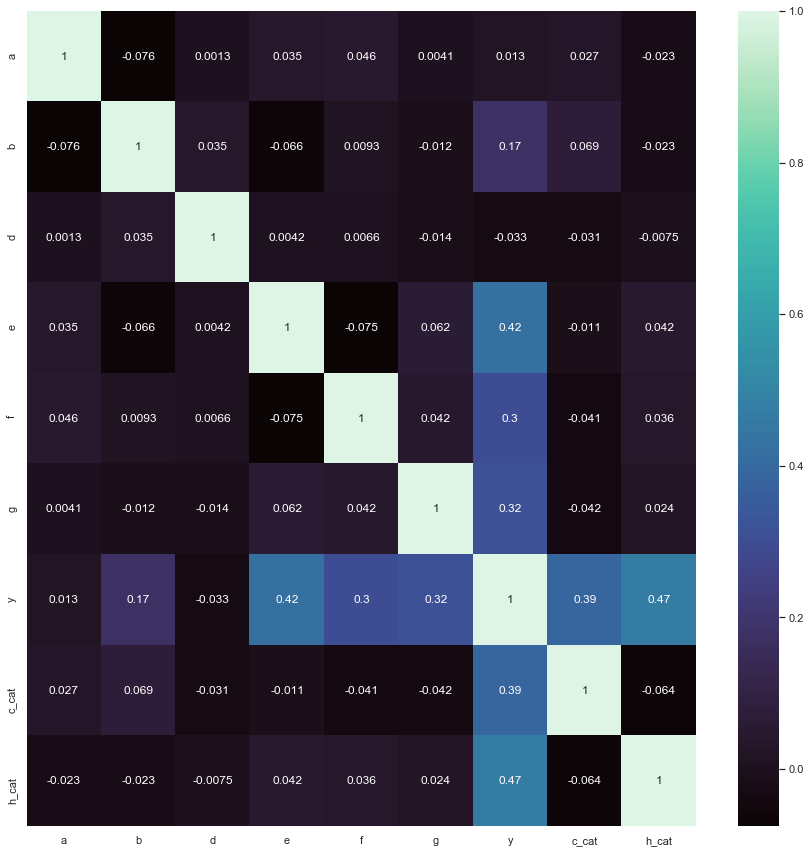

In [14]:
df = df_train.drop(columns=['c', 'h', 'Unnamed: 0'])

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="mako", annot=True)
  
# displaying heatmap
plt.show()

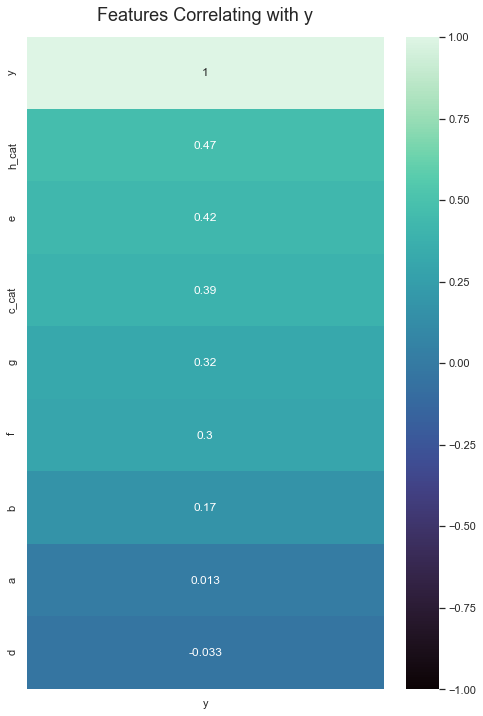

In [15]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['y']].sort_values(by='y', ascending=False), vmin=-1, vmax=1, annot=True, cmap='mako')
heatmap.set_title('Features Correlating with y', fontdict={'fontsize':18}, pad=16);

As we can see, column 'a' and 'h' does not correlate with the dependant variable 'y'. Let's proceed with data modeling.

## 2. Data modeling

In [16]:
df = df.drop(columns=['a', 'd'])
# df = df_train.drop(columns=['Unnamed: 0', 'c', 'h'])

In [17]:
df.head(5)

,b,e,f,g,y,c_cat,h_cat
0,0.669570,0.623469,0.925886,0.812685,3.707514,1,1
1,0.922627,0.025415,0.698444,0.658545,2.689243,2,1
2,0.351081,0.699661,0.545722,0.836863,2.886508,3,0
3,0.572042,0.609730,0.488668,0.342675,2.478168,1,0
4,0.395323,0.736433,0.708408,0.695521,3.182666,2,1


In [18]:
X = df.drop(['y'], axis=1)
Y = df['y']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape: ", X_test.shape, y_test.shape)

Training data shape: (350, 6) (350,)
Testing data shape:  (150, 6) (150,)


### 2.1 Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
results = model.fit(X_train, y_train)

In [21]:
r_sq = model.score(X_train, y_train)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8057190308124527


In [22]:
print('intercept:', model.intercept_)
print('slope:', model.coef_)

intercept: 0.48954796840799153
slope: [0.36589503 0.94736386 0.63731293 0.57616953 0.22892096 0.70128269]


In [23]:
y_pred = model.predict(X_test)

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
219,2.989353,2.492594
147,1.797005,2.128321
108,2.897907,3.098704
416,1.962452,2.122357
298,1.999820,2.385503
...,...,...
16,2.729885,2.480870
92,2.966326,2.514620
72,2.302714,2.283045
13,2.330156,2.336617


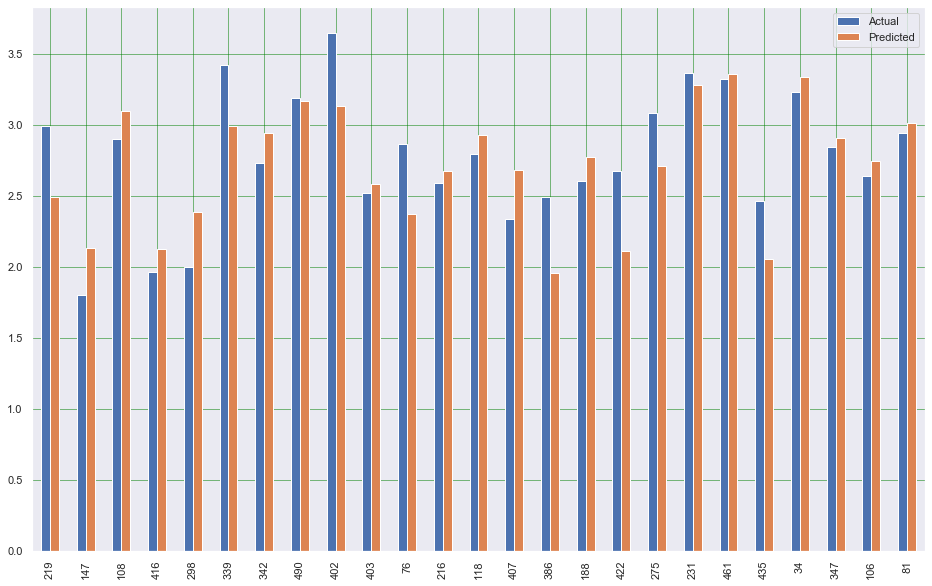

In [25]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [26]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.2402966336092829
Mean Squared Error: 0.08552918103794044
Root Mean Squared Error: 0.29245372460945074


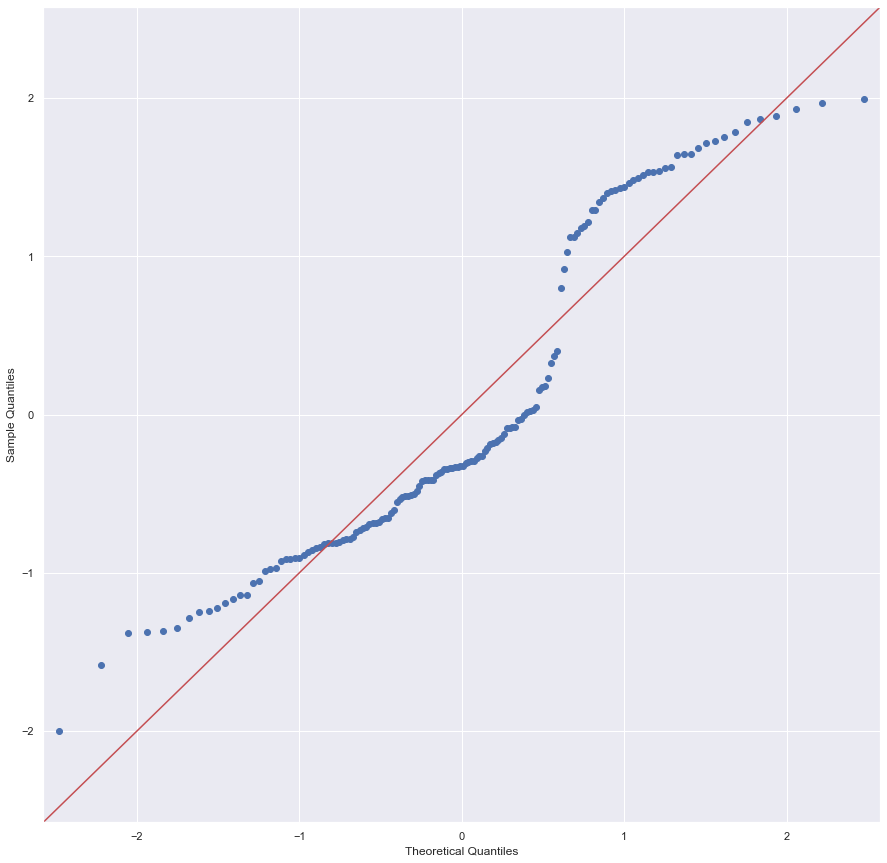

<Figure size 864x576 with 0 Axes>

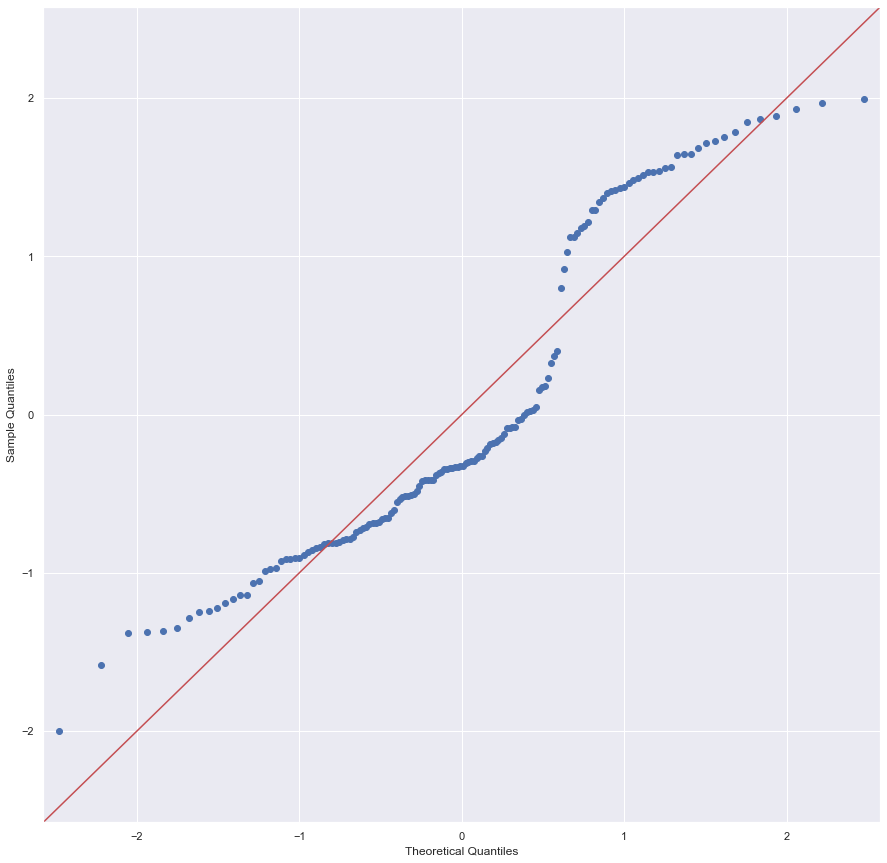

In [27]:
plt.figure(figsize=(12, 8))
residue = y_test - y_pred
qqplot(residue, line = '45', fit='True')

### 2.2 Random Forest Regressor

In [28]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
  
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(X_train, y_train)  

RandomForestRegressor(random_state=0)

In [29]:
y_pred = regressor.predict(X_test)

In [30]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
219,2.989353,2.897267
147,1.797005,2.060985
108,2.897907,2.629091
416,1.962452,2.290615
298,1.999820,2.239816
...,...,...
16,2.729885,2.891052
92,2.966326,2.827263
72,2.302714,2.231158
13,2.330156,2.482579


In [31]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.16904317112373335
Mean Squared Error: 0.04044802986467217
Root Mean Squared Error: 0.2011169556866655


In [32]:
train_features = X.columns

# Get feature importances
importances = list(regressor.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(train_features, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: c_cat                Importance: 0.3
Variable: e                    Importance: 0.22
Variable: h_cat                Importance: 0.22
Variable: f                    Importance: 0.11
Variable: g                    Importance: 0.11
Variable: b                    Importance: 0.04


[None, None, None, None, None, None]

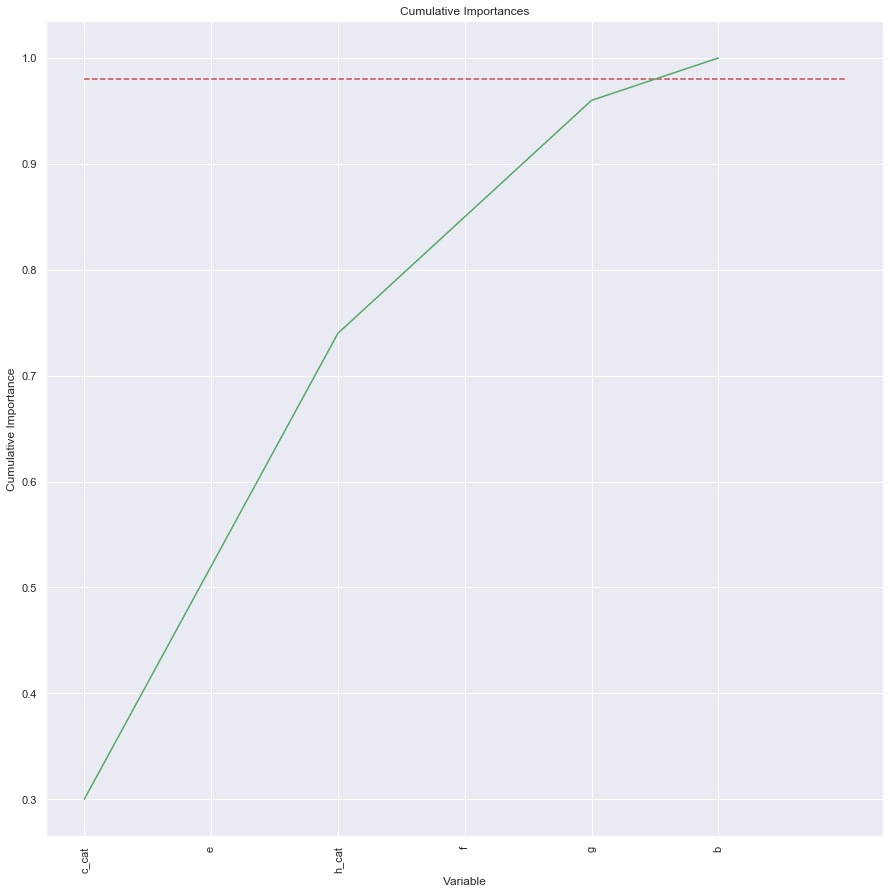

In [33]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# list of x locations for plotting
x_values = list(range(len(importances)))

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 90% of importance retained
plt.hlines(y = 0.98, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

### 2.3 K Nearest Neighbours (KNN)

In [49]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=3)

In [50]:
y_pred = neigh.predict(X_test)

In [51]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
219,2.989353,3.090737
147,1.797005,2.095877
108,2.897907,2.855844
416,1.962452,2.094163
298,1.999820,2.103234
...,...,...
16,2.729885,2.626771
92,2.966326,2.870037
72,2.302714,2.424407
13,2.330156,2.259931


In [52]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.15423537440666663
Mean Squared Error: 0.03784647037990767
Root Mean Squared Error: 0.1945416931660349


In [53]:
print(neigh.score(X_test, y_test))

0.8817387146271409
